# Exam 2021, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 8


## Probability warmup
Let's say we have an exam question which consists of $20$ yes/no questions. 
From past performance of similar students, a randomly chosen student will know the correct answer to $N \sim \text{binom}(20,11/20)$ questions. Furthermore, we assume that the student will guess the answer with equal probability to each question they don't know the answer to, i.e. given $N$ we define $Z \sim \text{binom}(20-N,1/2)$ as the number of correctly guessed answers. Define $Y = N + Z$, i.e., $Y$ represents the number of total correct answers.

We are interested in setting a deterministic threshold $T$, i.e., we would pass a student at threshold $T$ if $Y \geq T$. Here $T \in \{0,1,2,\ldots,20\}$.

1. [5p] For each threshold $T$, compute the probability that the student *knows* less than $10$ correct answers given that the student passed, i.e., $N < 10$. Put the answer in `problem11_probabilities` as a list.
2. [3p] What is the smallest value of $T$ such that if $Y \geq T$ then we are 90\% certain that $N \geq 10$?

In [ ]:

# Hint the PMF of N is p_N(k) where p_N is
p = 11/20
p_N = lambda k: binomial(20,k)*(1-p)^(20-k)*(p)^k

In [6]:
P_N = binom.pmf(np.arange(n_questions + 1), n_questions, p_know)
P_N

array([1.15944533e-07, 2.83419969e-06, 3.29082076e-05, 2.41326855e-04,
       1.25355894e-03, 4.90280831e-03, 1.49808032e-02, 3.66197411e-02,
       7.27308747e-02, 1.18524388e-01, 1.59349455e-01, 1.77054951e-01,
       1.62300371e-01, 1.22072074e-01, 7.45996009e-02, 3.64709160e-02,
       1.39298637e-02, 4.00597389e-03, 8.16031718e-04, 1.04986537e-04,
       6.41584392e-06])

In [1]:

# Part 1: 
# replace XXX to represent P(N < 10) for T = [0,1,2,...,20], i.e. your answer should be a list
# of length 21.
# problem11_probabilities = [XXX,XXX,...,XXX]

import numpy as np
from scipy.stats import binom

# 定义参数
n_questions = 20
p_know = 11 / 20
thresholds = range(21)

# 计算 P(N = n) 对于 n = 0 到 20
P_N = binom.pmf(np.arange(n_questions + 1), n_questions, p_know)

def P_Y_given_N(T, N):
    if T > N:
        return 1 - binom.cdf(T - N - 1, n_questions - N, 0.5)
    else:
        return 1.0

# 计算 P(Y >= T)
P_Y_ge_T = []
for T in thresholds:
    P_Y_ge_T_T = sum(P_Y_given_N(T, N) * P_N[N] for N in range(n_questions + 1))
    P_Y_ge_T.append(P_Y_ge_T_T)

# 计算 P(N < 10 且 Y >= T)
P_N_lt_10_and_Y_ge_T = []
for T in thresholds:
    P_N_lt_10_and_Y_ge_T_T = sum(P_Y_given_N(T, N) * P_N[N] for N in range(10))
    P_N_lt_10_and_Y_ge_T.append(P_N_lt_10_and_Y_ge_T_T)

# 计算 P(N < 10 | Y >= T)
P_N_lt_10_given_Y_ge_T = [P_N_lt_10_and_Y_ge_T[T] / P_Y_ge_T[T] for T in thresholds]

# 输出结果
problem11_probabilities = P_N_lt_10_given_Y_ge_T
problem11_probabilities


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[0.24928935982841188,
 0.2492893598283289,
 0.24928935982261052,
 0.24928935963549284,
 0.2492893557683934,
 0.24928929915834971,
 0.24928867518930253,
 0.2492833020795846,
 0.24924628523366027,
 0.2490390263029906,
 0.2480856990043144,
 0.24460820014975937,
 0.2349439695781524,
 0.21475641513175917,
 0.18267139196621002,
 0.1427252244707205,
 0.10227042692681916,
 0.0676280995056458,
 0.04166472439122745,
 0.024151134340423378,
 0.013287462679601613]

In [2]:

# Part 2: Give an integer between 0 and 20 which is the answer to 2.
# problem12_T = XXX
# 找到满足条件的最小 T
for T, prob in enumerate(P_N_lt_10_given_Y_ge_T):
    if prob <= 0.1:
        T_min = T
        break

T_min


17

---
## Exam vB, PROBLEM 2
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from 

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

In [ ]:

def problem2_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    
    XXX
    
    return XXX

In [7]:
class LinearCongruentialGenerator:
    def __init__(self, seed, a=48271, c=0, m=2**31 - 1):
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m
        self.current = seed
    
    def next(self):
        self.current = (self.a * self.current + self.c) % self.m
        return self.current
    
    def next_uniform(self):
        return self.next() / self.m

# 初始化 LCG
seed = 12345
lcg = LinearCongruentialGenerator(seed)

# 生成 10 个随机数
random_numbers = [lcg.next() for _ in range(10)]
print(random_numbers)

# 生成 10 个均匀分布在 [0, 1] 的随机数
uniform_random_numbers = [lcg.next_uniform() for _ in range(10)]
print(uniform_random_numbers)


[595905495, 1558181227, 1498755989, 2021244883, 887213142, 1546689008, 808633566, 888096514, 1238265880, 1419946529]
[0.46721662416458903, 0.01366504887755264, 0.6255743683434903, 0.10033430862256061, 0.23741151962308749, 0.09146372605648996, 0.045520472827144186, 0.31874383907706655, 0.08385608907968554, 0.8172759655012172]


In [ ]:

def problem2_uniform(generator=None, period = 1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem2_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """
    
    XXX
    
    return XXX

In [ ]:

def problem2_accept_reject(uniformGenerator=None, size=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers 
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution
    
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    
    XXX
    
    return XXX

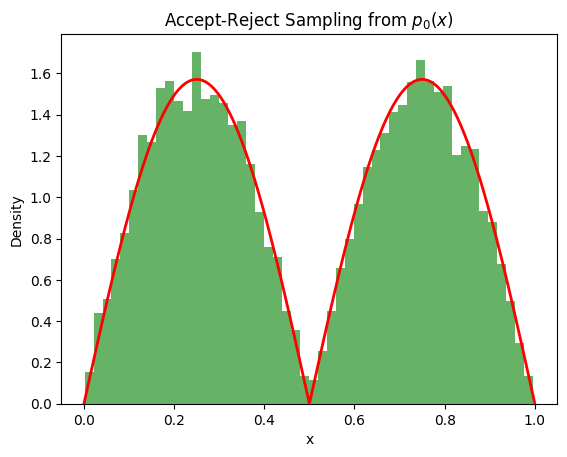

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def target_density(x):
    return (np.pi / 2) * np.abs(np.sin(2 * np.pi * x))

def accept_reject_sampler(num_samples):
    samples = []
    M = np.pi / 2  # 目标分布的上界
    while len(samples) < num_samples:
        x = np.random.uniform(0, 1)  # 从均匀分布中采样
        u = np.random.uniform(0, M)  # 从均匀分布 U[0, M] 中采样
        if u <= target_density(x):
            samples.append(x)
    return samples

# 生成 10000 个样本
num_samples = 10000
samples = accept_reject_sampler(num_samples)

# 绘制生成的样本的直方图
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g')

# 绘制目标分布 p_0(x)
x = np.linspace(0, 1, 1000)
y = target_density(x)
plt.plot(x, y, 'r-', lw=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Accept-Reject Sampling from $p_0(x)$')
plt.show()


---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:

# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

print("LCG output: %s" % problem2_LCG(size=10, seed = 1))

period = XXX

print("Uniform sampler %s" % problem2_uniform(generator=problem2_LCG, period = period, size=10, seed=1))

uniform_sampler = lambda size,seed: problem2_uniform(generator=problem2_LCG, period = period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator = uniform_sampler,n_iterations=20,seed=1))

In [ ]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below

def testUniformGenerator(size,seed):
    set_random_seed(seed)
    
    return [random() for s in range(size)]

print("Accept-Reject sampler %s" % problem2_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))

---
## Exam vB, PROBLEM 3
Maximum Points = 8


## Concentration of measure

As you recall, we said that concentration of measure was simply the phenomenon where we expect that the probability of a large deviation of some quantity becoming smaller as we observe more samples: [0.4 points per correct answer]

1. Which of the following will exponentially concentrate, i.e. for some $C_1,C_2,C_3,C_4 $ 
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq C_1 e^{-C_2 n \epsilon^2} \wedge C_3 e^{-C_4 n (\epsilon+1)} \enspace .
$$

    1. The empirical mean of i.i.d. sub-Gaussian random variables?
    2. The empirical mean of i.i.d. sub-Exponential random variables?
    3. The empirical mean of i.i.d. random variables with finite variance?
    4. The empirical variance of i.i.d. random variables with finite variance?
    5. The empirical variance of i.i.d. sub-Gaussian random variables?
    6. The empirical variance of i.i.d. sub-Exponential random variables?
    7. The empirical third moment of i.i.d. sub-Gaussian random variables?
    8. The empirical fourth moment of i.i.d. sub-Gaussian random variables?
    9. The empirical mean of i.i.d. deterministic random variables?
    10. The empirical tenth moment of i.i.d. Bernoulli random variables?

2. Which of the above will concentrate in the weaker sense, that for some $C_1$
$$
    P(Z - \mathbb{E}[Z] \geq \epsilon) \leq \frac{C_1}{n \epsilon^2}?
$$

In [ ]:

# Answers to part 1, which of the alternatives exponentially concentrate, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_1 = [1, 2]

In [ ]:

# Answers to part 2, which of the alternatives concentrate in the weaker sense, answer as a list
# i.e. [1,4,5] that is example 1, 4, and 5 concentrate
problem3_answer_2 = [3]

---
## Exam vB, PROBLEM 4
Maximum Points = 8


## SMS spam filtering [8p]

In the following problem we will explore SMS spam texts. The dataset is the `SMS Spam Collection Dataset` and we have provided for you a way to load the data. If you run the appropriate cell below, the result will be in the `spam_no_spam` variable. The result is a `list` of `tuples` with the first position in the tuple being the SMS text and the second being a flag `0 = not spam` and `1 = spam`.

1. [3p] Let $X$ be the random variable that represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.
2. [3p] Provide a "90\%" interval of confidence around the true probability. I.e. use the Hoeffding inequality to obtain for your estimate $\hat P$ of the above quantity. Find $l > 0$ such that the following holds:
$$
    \mathbb{P}(\hat P - l \leq \mathbb{E}[\hat P] \leq \hat P + l) \geq 0.9 \enspace .
$$
3. [2p] Repeat the two exercises above for "free" appearing twice in the SMS.

In [ ]:
# 加载数据
from exam_extras import load_sms
spam_no_spam = load_sms()

# 计算包含 "free" 或 "prize" 的条件概率
condition_texts = [text.lower() for text, label in spam_no_spam if "free" in text.lower() or "prize" in text.lower()]
N_condition = len(condition_texts)
N_spam = sum(1 for text, label in spam_no_spam if ("free" in text.lower() or "prize" in text.lower()) and label == 1)

# 估计条件概率
problem4_hatP = N_spam / N_condition if N_condition > 0 else 0

# 计算90%的置信区间
import math

N = N_condition  # 样本量
delta = 0.1  # 1 - 置信水平
problem4_l = math.sqrt(math.log(2 / delta) / (2 * N))  # Hoeffding不等式的l值

# 计算包含 "free" 至少两次的条件概率
condition_texts2 = [text.lower() for text, label in spam_no_spam if text.lower().count("free") >= 2]
N_condition2 = len(condition_texts2)
N_spam2 = sum(1 for text, label in spam_no_spam if text.lower().count("free") >= 2 and label == 1)

# 估计条件概率
problem4_hatP2 = N_spam2 / N_condition2 if N_condition2 > 0 else 0

# 计算90%的置信区间
N2 = N_condition2  # 样本量
problem4_l2 = math.sqrt(math.log(2 / delta) / (2 * N2))  # Hoeffding不等式的l值

(problem4_hatP, problem4_l, problem4_hatP2, problem4_l2)


In [ ]:
# 加载数据
from exam_extras import load_sms
spam_no_spam = load_sms()

# 使用numpy计算
import numpy as np

# 计算包含 "free" 或 "prize" 的条件概率
condition_texts = [(text.lower(), label) for text, label in spam_no_spam if "free" in text.lower() or "prize" in text.lower()]
N_condition = len(condition_texts)
N_spam = np.sum([label for text, label in condition_texts])

# 估计条件概率
problem4_hatP = N_spam / N_condition if N_condition > 0 else 0

# 计算90%的置信区间
delta = 0.1  # 1 - 置信水平
problem4_l = np.sqrt(np.log(2 / delta) / (2 * N_condition))  # Hoeffding不等式的l值

# 计算包含 "free" 至少两次的条件概率
condition_texts2 = [(text.lower(), label) for text, label in spam_no_spam if text.lower().count("free") >= 2]
N_condition2 = len(condition_texts2)
N_spam2 = np.sum([label for text, label in condition_texts2])

# 估计条件概率
problem4_hatP2 = N_spam2 / N_condition2 if N_condition2 > 0 else 0

# 计算90%的置信区间
problem4_l2 = np.sqrt(np.log(2 / delta) / (2 * N_condition2))  # Hoeffding不等式的l值

problem4_hatP, problem4_l, problem4_hatP2, problem4_l2


In [ ]:

# Run this cell to get the SMS text data
from exam_extras import load_sms
spam_no_spam = load_sms()

In [ ]:

# fill in the estimate for part 1 here (should be a number between 0 and 1)
problem4_hatP = XXX

In [ ]:

# fill in the calculated l from part 2 here
problem4_l = XXX

In [ ]:

# fill in the estimate for hatP for the double free question in part 3 here (should be a number between 0 and 1)
problem4_hatP2 = XXX

In [ ]:

# fill in the estimate for l for the double free question in part 3 here
problem4_l2 = XXX

---
## Exam vB, PROBLEM 5
Maximum Points = 8


## Markovian travel

The dataset `Travel Dataset - Datathon 2019` is a simulated dataset designed to mimic real corporate travel systems -- focusing on flights and hotels. The file is at `data/flights.csv` in the same folder as `Exam.ipynb`, i.e. you can use the path `data/flights.csv` from the notebook to access the file.

1. [2p] In the first code-box 
    1. Load the csv from file `data/flights.csv`
    2. Fill in the value of the variables as specified by their names.
2. [2p] In the second code-box your goal is to estimate a Markov chain transition matrix for the travels of these users. For example, if we enumerate the cities according to alphabetical order, the first city `'Aracaju (SE)'` would correspond to $0$. Each row of the file corresponds to one flight, i.e. it has a starting city and an ending city. We model this as a stationary Markov chain, i.e. each user's travel trajectory is a realization of the Markov chain, $X_t$. Here, $X_t$ is the current city the user is at, at step $t$, and $X_{t+1}$ is the city the user travels to at the next time step. This means that to each row in the file there is a corresponding pair $(X_{t},X_{t+1})$. The stationarity assumption gives that for all $t$ there is a transition density $p$ such that $P(X_{t+1} = y | X_t = x) = p(x,y)$ (for all $x,y$). The transition matrix should be `n_cities` x `n_citites` in size.
3. [2p] Use the transition matrix to compute out the stationary distribution.
4. [2p] Given that we start in 'Aracaju (SE)' what is the probability that after 3 steps we will be back in 'Aracaju (SE)'?

In [ ]:
# 获取起点和终点城市的唯一值
start_cities = flights_df['start_city'].unique()
end_cities = flights_df['end_city'].unique()

# 合并起点和终点城市，获取所有唯一城市
all_cities = set(start_cities).union(set(end_cities))
number_of_cities = len(all_cities)

# 显示城市数量和城市列表
print(f"城市数量: {number_of_cities}")
print(f"所有城市: {all_cities}")
number_of_cities = XXX
number_of_userCodes = XXX
number_of_observations = XXX

In [ ]:

# This is a very useful function that you can use for part 2. You have seen this before when parsing the
# pride and prejudice book.

def makeFreqDict(myDataList):
    '''Make a frequency mapping out of a list of data.

    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''

    freqDict = {} # start with an empty dictionary

    for res in myDataList:
        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + 1 # add 1 to the count using sage integers
        else: # the data value does not exist as a key value
            freqDict[res] = 1 # add a new key-value pair for this new data value, frequency 1

    return freqDict # return the dictionary created

In [ ]:
# 提取所有的城市对
city_pairs = [(city_to_index[row['start_city']], city_to_index[row['end_city']]) for _, row in flights_df.iterrows()]

# 计算频率字典
def makeFreqDict(myDataList):
    freqDict = {}  # 创建一个空字典

    for res in myDataList:
        if res in freqDict:  # 如果数据值已经存在于字典中
            freqDict[res] = freqDict[res] + 1  # 将计数加1
        else:  # 如果数据值不存在于字典中
            freqDict[res] = 1  # 为这个新数据值添加一个新的键值对，频率为1

    return freqDict  # 返回创建的字典

freq_dict = makeFreqDict(city_pairs)


In [ ]:
import numpy as np

# 初始化转移矩阵
transition_matrix = np.zeros((n_cities, n_cities))

# 提取所有的城市对
city_pairs = [(city_to_index[row['start_city']], city_to_index[row['end_city']]) for _, row in flights_df.iterrows()]

# 计算频率字典
freq_dict = makeFreqDict(city_pairs)

# 填充转移矩阵
for (start_idx, end_idx), count in freq_dict.items():
    transition_matrix[start_idx, end_idx] = count

# 归一化转移矩阵
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# 显示转移矩阵
print("转移矩阵:")
print(transition_matrix)


In [ ]:

cities = XXX
unique_cities = sorted(set(cities)) # The unique cities
n_cities = len(unique_cities) # The number of unique citites

# Count the different transitions
transitions = XXX # A list containing tuples ex: ('Aracaju (SE)','Rio de Janeiro (RJ)') of all transitions in the text
transition_counts = XXX # A dictionary that counts the number of each transition 
# ex: ('Aracaju (SE)','Rio de Janeiro (RJ)'):4
indexToCity = XXX # A dictionary that maps the n-1 number to the n:th unique_city,
# ex: 0:'Aracaju (SE)'
cityToIndex = XXX # The inverse function of indexToWord, 
# ex: 'Aracaju (SE)':0

# Part 3, finding the maximum likelihood estimate of the transition matrix

transition_matrix = XXX # a numpy array of size (n_cities,n_cities)

# The transition matrix should be ordered in such a way that
# p_{'Aracaju (SE)','Rio de Janeiro (RJ)'} = transition_matrix[cityToIndex['Aracaju (SE)'],cityToIndex['Rio de Janeiro (RJ)']]
# and represents the probability of travelling Aracaju (SE)->Rio de Janeiro (RJ)

# Make sure that the transition_matrix does not contain np.nan from division by zero for instance

In [ ]:

# This should be a numpy array of length n_cities which sums to 1 and is all positive

stationary_distribution_problem5 = XXX

In [ ]:

# Compute the return probability for part 3 of problem 5

return_probability_problem5 = XXX

In [ ]:
import numpy as np

# 2. 提取转移并计算转移频率
transitions = [(row['start_city'], row['end_city']) for _, row in flights_data.iterrows()]

# 创建频率字典
def makeFreqDict(myDataList):
    freqDict = {}
    for res in myDataList:
        if res in freqDict:
            freqDict[res] = freqDict[res] + 1
        else:
            freqDict[res] = 1
    return freqDict

transition_counts = makeFreqDict(transitions)

# 定义字典来将城市映射到索引和反向映射
indexToCity = {i: city for i, city in enumerate(unique_cities)}
cityToIndex = {city: i for i, city in enumerate(unique_cities)}

# 计算最大似然估计的转移矩阵
transition_matrix = np.zeros((n_cities, n_cities))

for (start, end), count in transition_counts.items():
    i, j = cityToIndex[start], cityToIndex[end]
    transition_matrix[i, j] = count

# 将转移矩阵中的每一行归一化
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# 确保转移矩阵不包含np.nan值
transition_matrix = np.nan_to_num(transition_matrix)


In [ ]:
# 3. 计算平稳分布
eigvals, eigvecs = np.linalg.eig(transition_matrix.T)
stationary_distribution = np.real(eigvecs[:, np.isclose(eigvals, 1)])
stationary_distribution = stationary_distribution / stationary_distribution.sum()
stationary_distribution = stationary_distribution.flatten()
stationary_distribution_problem5 = stationary_distribution


In [ ]:
# 4. 计算从'Aracaju (SE)'开始，经过3步后回到'Aracaju (SE)'的概率
initial_distribution = np.zeros(n_cities)
initial_distribution[cityToIndex['Aracaju (SE)']] = 1

probability_3_steps = np.linalg.matrix_power(transition_matrix, 3)
return_probability_problem5 = probability_3_steps[cityToIndex['Aracaju (SE)'], cityToIndex['Aracaju (SE)']]

return_probability_problem5


---
#### Local Test for Exam vB, PROBLEM 5
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [ ]:
# Once you have created all your functions, you can make a small test here to see
# what would be generated from your model.
import numpy as np

start = np.zeros(shape=(n_cities,1))
start[cityToIndex['Aracaju (SE)'],0] = 1

current_pos = start
for i in range(10):
    random_word_index = np.random.choice(range(n_cities),p=current_pos.reshape(-1))
    current_pos = np.zeros_like(start)
    current_pos[random_word_index] = 1
    print(indexToCity[random_word_index],end='->')
    current_pos = (current_pos.T@transition_matrix).T

---
## Exam vB, PROBLEM 6
Maximum Points = 8


## Black box testing

In the following problem we will continue with our SMS spam / nospam data. This time we will try to approach the problem as a pattern recognition problem. For this particular problem I have provided you with everything -- data is prepared, split into train-test sets and a black-box model has been fitted on the training data and predicted on the test data. Your goal is to calculate test metrics and provide guarantees for each metric.

1. [2p] Compute precision for class 1 (see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95\% confidence.
2. [2p] Compute recall for class 1(see notes 8.3.2 for definition), then provide an interval using Hoeffding's inequality for a 95\% interval.
3. [2p] Compute accuracy (0-1 loss), then provide an interval using Hoeffding's inequality for a 95\% interval.
4. [2p] If we would have used a classifier with VC-dimension 3, would we have obtained a smaller interval for accuracy by using all data?

In [ ]:
import exam_extras
from exam_extras import load_sms_problem6
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from math import sqrt, log

# 加载数据，分割训练集和测试集，并运行"黑盒"算法
X_problem6, Y_problem6 = load_sms_problem6()
X_train_problem6, X_test_problem6, Y_train_problem6, Y_test_problem6 = exam_extras.train_test_split(X_problem6, Y_problem6)
predictions_problem6 = exam_extras.knn_predictions(X_train_problem6, Y_train_problem6, X_test_problem6, k=4)

# 计算class 1的precision
problem6_precision = precision_score(Y_test_problem6, predictions_problem6, pos_label=1)

# 计算Hoeffding's inequality下95%置信区间的区间长度
n = len(Y_test_problem6)
epsilon_precision = sqrt(log(2 / 0.05) / (2 * n))
problem6_precision_l = (problem6_precision - epsilon_precision, problem6_precision + epsilon_precision)


In [1]:

# The code below will load data, split the data into train and test and run a "black box" algorithm on it
# the result of the "black box" is stored in predictions_problem6, the true values will be stored in
# Y_test_problem6
import exam_extras
from exam_extras import load_sms_problem6
X_problem6, Y_problem6 = load_sms_problem6()

X_train_problem6,X_test_problem6,Y_train_problem6,Y_test_problem6 = exam_extras.train_test_split(X_problem6,Y_problem6)
predictions_problem6 = exam_extras.knn_predictions(X_train_problem6,Y_train_problem6,X_test_problem6,k=4)

In [ ]:
# VC维度为3的分类器在使用所有数据时的区间长度
# 设VC维度d = 3
d = 3
epsilon_vc = sqrt((8 / n) * log((4 * ((2 * n) ** d + 1)) / 0.05))
problem6_VC_l = (problem6_accuracy - epsilon_vc, problem6_accuracy + epsilon_vc)

# 判断新的区间是否更小
problem6_VC_smaller = epsilon_vc < epsilon_accuracy


In [ ]:

# Compute the precision of predictions_problem6 with respect to Y_test_problem6
problem6_precision = XXX

In [ ]:

# Compute the interval length l of precision of predictions_problem6 with respect to Y_test_problem6, with the same definition of l as in problem 4
problem6_precision_l = XXX

In [ ]:

# Repeat the same procedure but for recall
problem6_recall = XXX

In [ ]:

problem6_recall_l = XXX

In [ ]:

# Repeat the same procedure but for accuracy or 0-1 loss
problem6_accuracy = XXX

In [ ]:

problem6_accuracy_l = XXX

In [ ]:

# Below you will calculate the interval parameter l for a classifier running on all data with a VC dimension of 3
# put the value in problem6_VC_l and answer problem_VC_smaller as True if the interval is smaller than the test-accuracy above
# if not answer False. Make sure you replace XXX with something even if you only answer one of them.
problem6_VC_l = XXX # number
problem6_VC_smaller = XXX #True / False